## Exploratory Analysis of Reproduced Results

In [1]:
from ast import literal_eval
import os
import pandas as pd
from glob import glob
import numpy as np
from sklearn.metrics import classification_report
import torchvision
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
import matplotlib.pyplot as plt
from upsetplot import plot 
from matplotlib import pyplot
%matplotlib inline

In [231]:
search_path = "./"
file_extension = "*.csv"

dfs = []
[dfs.append(pd.read_csv(file, index_col=0))
 for path, subdir, files in os.walk(search_path)
 for file in glob(os.path.join(path, file_extension))]

df_orig = pd.concat(dfs, ignore_index=True)
df_orig['Accuracy'] = df_orig['Accuracy'].apply(lambda x: x*100)
df_orig['Original_CI'] = df_orig.Original_CI.apply(lambda x: literal_eval(x))
df_orig['Orig_CI_Low'], df_orig['Orig_CI_Hi'] = zip(*df_orig.Original_CI)

# Filter data into subsets based on test dataset used
df_orig_cifar10 = df_orig[df_orig['Testset'] == 'cifar10']
df_orig_cifar101 = df_orig[df_orig['Testset'] == 'cifar10.1']

In [232]:
df_orig

,Model,Testset,Epoch,Loss,Accuracy,Original_Accuracy,Original_CI,Orig_CI_Low,Orig_CI_Hi
0,resnext_29_4x64d,cifar10,100,0.6746,80.19,96.4,"(96.0, 96.7)",96.0,96.7
1,resnext_29_4x64d,cifar10,200,0.2311,93.21,96.4,"(96.0, 96.7)",96.0,96.7
2,resnext_29_4x64d,cifar10,300,0.1517,95.35,96.4,"(96.0, 96.7)",96.0,96.7
3,resnext_29_4x64d,cifar10.1,300,0.3742,89.05,89.6,"(88.2, 90.9)",88.2,90.9
4,pyramidnet_basic_110_84,cifar10,100,0.3607,89.51,95.7,"(95.3, 96.1)",95.3,96.1
5,pyramidnet_basic_110_84,cifar10,200,0.1904,95.15,95.7,"(95.3, 96.1)",95.3,96.1
6,pyramidnet_basic_110_84,cifar10,300,0.1892,95.25,95.7,"(95.3, 96.1)",95.3,96.1
7,pyramidnet_basic_110_84,cifar10.1,300,0.4247,88.80,89.3,"(87.8, 90.6)",87.8,90.6
8,resnext_29_8x64d,cifar10,100,0.4673,84.32,96.2,"(95.8, 96.6)",95.8,96.6
9,resnext_29_8x64d,cifar10,200,0.2246,93.24,96.2,"(95.8, 96.6)",95.8,96.6


#### Visualize the delta between our reproduced result and the original result published for the respective model.

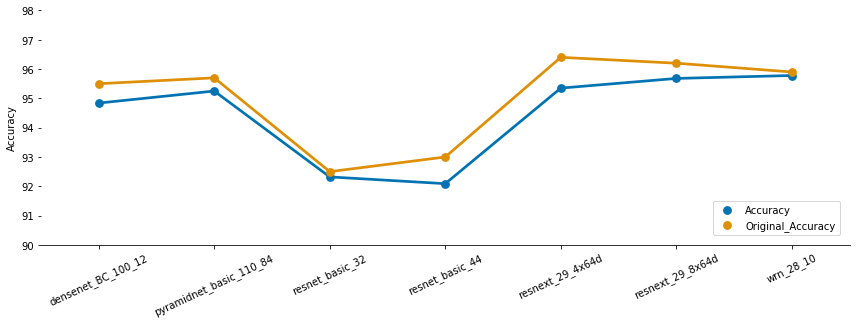

In [234]:
# Get accuracy score of last epoch for each model type
final_score = df_orig_cifar10[df_orig_cifar10.groupby(['Model'])['Epoch']
                              .transform(max) == df_orig_cifar10['Epoch']]

final_score_subset = final_score[['Model', 'Accuracy', 'Original_Accuracy']].sort_values(by=['Model'])
                                 #'Orig_CI_Low', 'Orig_CI_Hi']]

fss_melt = final_score_subset.melt('Model', var_name='cols',  value_name='vals')
g = sns.catplot(x="Model", y="vals", hue='cols', data=fss_melt, kind='point', 
                height=4, aspect=3, palette="colorblind",legend_out=False)

axes = g.axes
axes[0,0].set_ylim(90,98)

(g.set_axis_labels("", "Accuracy")
  .set_xticklabels(rotation=25)
  .despine(left=True))  
g.add_legend(loc='lower right', borderaxespad=1)
pass

#### Do our models seem to error in the same way?

In [161]:
# Retrieve the official labels of the CIFAR10 test dataset
testset = torchvision.datasets.CIFAR10(root='../../data/cifar10/', train=False,
                                       download=True)
test_labels_CIFAR10 = testset.targets
test_data_CIFAR10 = testset.data

# Retrieve the official labels of the CIFAR10.1 test dataset
test_labels_CIFAR101 =np.load('../data/cifar101/cifar10.1_v6_labels.npy')  
test_data_CIFAR101 = np.load('../data/cifar101/cifar10.1_v6_data.npy')

# Create a dictionary that maps numeric class number to class name
class_dict = {0: "airplane",
              1: "automobile",
              2: "bird",
              3: "cat",
              4: "deer",
              5: "dog",
              6: "frog",
              7: "horse",
              8: "ship",
              9: "truck"
}

classes = ['0 airplane', '1 automobile', '2 bird', '3 cat', '4  deer', '5 dog', '6 frog', 
           '7 horse', '8 ship', '9 truck']

# Confirm that when we compare these labels to our guesses, we get the accuracy score.
def confirm_score(zfile, test_labels):
    print("\nAccuracy:", zfile['acc'])
    print(" -> Sanity Check:", np.sum(test_labels_CIFAR10 == zfile['labels']), "of", 
          len(test_labels), "correct\n")
    
    # Examine the classes to see if the model is balanced in its accuracy across all labels 
    report = classification_report(test_labels, zfile['labels'], target_names=classes, output_dict=True)
    print(pd.DataFrame(report).transpose())


Files already downloaded and verified


In [169]:
number_to_analyze = 20

def error_by_r_score(zfile, test_labels, testset):
    images_to_print = []
    
    # Determine the probability we associatd with our predicted label
    pp_max = np.max(zfile['probs'], axis=1)

    # Retrieve the model's predicted probability of the correct label
    pp_correct = zfile['probs'][range(zfile['probs'].shape[0]), test_labels]

    # Calculate the R ratio for each document
    r = pp_max/pp_correct

    # Retrieve the row numbers where the R score is the highest
    max_r_value_indexes = r.argsort()[-1 * number_to_analyze:]

    # Create list to hold stats on highest R Score images
    stats = []
    
    for mi in max_r_value_indexes:
        #print("-- R Ratio:", r[mi], " ( index", mi, 
        #      ")\n   Guessed Label:", zfile['labels'][mi], class_dict[zfile['labels'][mi]], 
        #      "\n   Correct Label:", test_labels[mi], class_dict[test_labels[mi]],
        #      "\n   Class Probs:", zfile['probs'][mi], "\n")
        
        img_dict = {'prob_predicted': pp_max[mi],
                    'prob_correct': pp_correct[mi],
                    'r_value': r[mi],
                    'label_predicted_id': zfile['labels'][mi],
                    'label_predicted': class_dict[zfile['labels'][mi]],
                    'correct_label': test_labels[mi],
                    'correct_label_id': class_dict[test_labels[mi]],
                    'img_index': mi
                   }

        img=Image.fromarray(testset[mi])
        images_to_print.append(img)
        stats.append(img_dict)
        


    # Print the misclassified images
    fig = plt.figure(figsize=(16, 4))
    grid = ImageGrid(fig, 111,  
                     nrows_ncols=(2, 10),  
                     axes_pad=0.1,  
                     )

    for ax, im in zip(grid, images_to_print):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        
    return pd.DataFrame(stats)

#### Densenet 

In [170]:
output = './densenet_BC_100_12/predictions_300.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9484
 -> Sanity Check: 9484 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.951244  0.9560  0.953616   1000.0000
1 automobile   0.971087  0.9740  0.972541   1000.0000
2 bird         0.955533  0.9240  0.939502   1000.0000
3 cat          0.899288  0.8840  0.891578   1000.0000
4  deer        0.937683  0.9630  0.950173   1000.0000
5 dog          0.898354  0.9280  0.912937   1000.0000
6 frog         0.966000  0.9660  0.966000   1000.0000
7 horse        0.983673  0.9640  0.973737   1000.0000
8 ship         0.954769  0.9710  0.962816   1000.0000
9 truck        0.968528  0.9540  0.961209   1000.0000
accuracy       0.948400  0.9484  0.948400      0.9484
macro avg      0.948616  0.9484  0.948411  10000.0000
weighted avg   0.948616  0.9484  0.948411  10000.0000


In [171]:
output = './densenet_BC_100_12/predictions_300_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.883
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score   support
0 airplane     0.859296   0.855  0.857143   200.000
1 automobile   0.968354   0.765  0.854749   200.000
2 bird         0.873171   0.895  0.883951   200.000
3 cat          0.851064   0.800  0.824742   200.000
4  deer        0.898551   0.930  0.914005   200.000
5 dog          0.864322   0.860  0.862155   200.000
6 frog         0.921182   0.935  0.928040   200.000
7 horse        0.939394   0.930  0.934673   200.000
8 ship         0.858491   0.910  0.883495   200.000
9 truck        0.822511   0.950  0.881671   200.000
accuracy       0.883000   0.883  0.883000     0.883
macro avg      0.885634   0.883  0.882462  2000.000
weighted avg   0.885634   0.883  0.882462  2000.000


/Applications/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


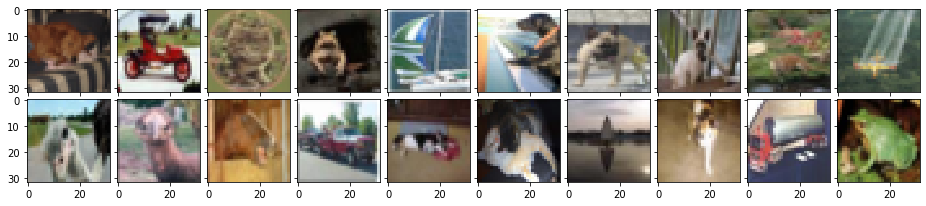

In [172]:
df_densenet_errors  = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [173]:
df_densenet_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.999986,1.330717e-05,7.514643e+04,3,cat,5,dog,5830
1,0.999588,1.096647e-05,9.114944e+04,9,truck,1,automobile,1969
2,0.999925,1.023711e-05,9.767648e+04,6,frog,3,cat,5511
3,0.995281,7.736055e-06,1.286549e+05,5,dog,6,frog,8728
4,0.999388,6.549802e-06,1.525830e+05,0,airplane,8,ship,1772
5,0.887884,5.223285e-06,1.699857e+05,1,automobile,5,dog,2525
6,0.807098,4.371054e-06,1.846460e+05,5,dog,3,cat,2804
7,0.999940,5.301942e-06,1.885988e+05,5,dog,3,cat,4614
8,0.999968,2.706531e-06,3.694648e+05,4,deer,3,cat,4965
9,0.999197,1.989888e-06,5.021373e+05,8,ship,0,airplane,378


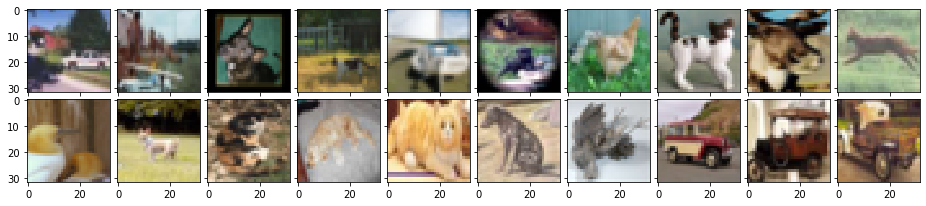

In [174]:
df_densenet_errors_101  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [175]:
df_densenet_errors_101 

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.965693,1.702146e-04,5.673386e+03,9,truck,1,automobile,365
1,0.985442,1.526594e-04,6.455169e+03,8,ship,0,airplane,76
2,0.999797,1.389711e-04,7.194279e+03,3,cat,5,dog,1126
3,0.994349,1.198931e-04,8.293630e+03,4,deer,3,cat,772
4,0.996554,1.052018e-04,9.472788e+03,0,airplane,8,ship,1753
5,0.905748,8.101539e-05,1.117995e+04,8,ship,5,dog,1060
6,0.992400,6.888977e-05,1.440562e+04,3,cat,2,bird,592
7,0.999931,6.916542e-05,1.445709e+04,5,dog,3,cat,600
8,0.999896,5.984369e-05,1.670847e+04,3,cat,4,deer,996
9,0.928986,4.205892e-05,2.208772e+04,7,horse,3,cat,671


#### Resnet_basic_32 

In [176]:
output = './resnet_basic_32/predictions_160.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9232
 -> Sanity Check: 9232 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.918208  0.9430  0.930439   1000.0000
1 automobile   0.965966  0.9650  0.965483   1000.0000
2 bird         0.898899  0.8980  0.898449   1000.0000
3 cat          0.848423  0.8340  0.841150   1000.0000
4  deer        0.916091  0.9280  0.922007   1000.0000
5 dog          0.883249  0.8700  0.876574   1000.0000
6 frog         0.951613  0.9440  0.947791   1000.0000
7 horse        0.948847  0.9460  0.947421   1000.0000
8 ship         0.953047  0.9540  0.953523   1000.0000
9 truck        0.946215  0.9500  0.948104   1000.0000
accuracy       0.923200  0.9232  0.923200      0.9232
macro avg      0.923056  0.9232  0.923094  10000.0000
weighted avg   0.923056  0.9232  0.923094  10000.0000


In [177]:
output = './resnet_basic_32/predictions_160_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.832
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score   support
0 airplane     0.808743   0.740  0.772846   200.000
1 automobile   0.932515   0.760  0.837466   200.000
2 bird         0.795349   0.855  0.824096   200.000
3 cat          0.711340   0.690  0.700508   200.000
4  deer        0.866995   0.880  0.873449   200.000
5 dog          0.814070   0.810  0.812030   200.000
6 frog         0.880597   0.885  0.882793   200.000
7 horse        0.895000   0.895  0.895000   200.000
8 ship         0.831776   0.890  0.859903   200.000
9 truck        0.802632   0.915  0.855140   200.000
accuracy       0.832000   0.832  0.832000     0.832
macro avg      0.833902   0.832  0.831323  2000.000
weighted avg   0.833902   0.832  0.831323  2000.000


/Applications/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


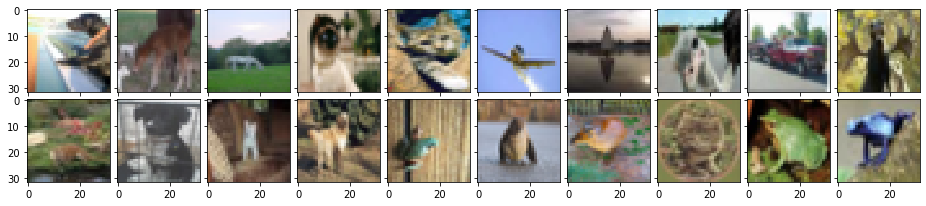

In [178]:
df_resnet32_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [179]:
df_resnet32_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.769989,6.086133e-07,1.265154e+06,0,airplane,5,dog,2525
1,0.999595,7.834623e-07,1.275869e+06,4,deer,7,horse,8943
2,0.976585,7.560041e-07,1.291772e+06,0,airplane,7,horse,4036
3,0.999999,6.714246e-07,1.489369e+06,5,dog,3,cat,1779
4,1.000000,4.381533e-07,2.282305e+06,2,bird,3,cat,1905
5,1.000000,2.810098e-07,3.558594e+06,2,bird,0,airplane,5454
6,0.999998,2.286959e-07,4.372610e+06,0,airplane,8,ship,5548
7,0.908763,1.495513e-07,6.076595e+06,5,dog,2,bird,7657
8,1.000000,9.241577e-08,1.082066e+07,9,truck,1,automobile,9227
9,0.999861,5.133766e-08,1.947617e+07,2,bird,4,deer,2785


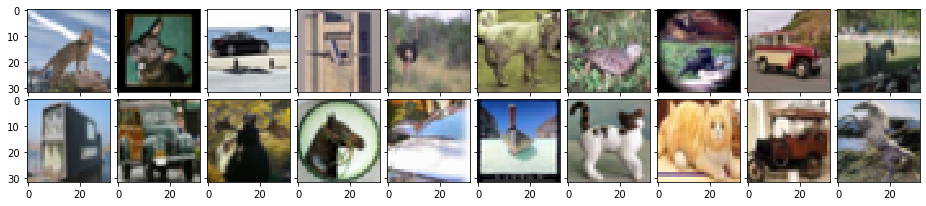

In [180]:
df_resnet32_errors_101  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [181]:
df_resnet32_errors_101

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.999958,2.097298e-05,4.767841e+04,2,bird,3,cat,686
1,0.999980,1.765366e-05,5.664436e+04,3,cat,5,dog,1126
2,0.999982,1.750031e-05,5.714080e+04,0,airplane,1,automobile,221
3,0.531151,9.019657e-06,5.888811e+04,3,cat,0,airplane,98
4,0.995534,1.316287e-05,7.563194e+04,3,cat,2,bird,482
5,0.992970,7.657860e-06,1.296668e+05,7,horse,3,cat,641
6,0.999989,5.556863e-06,1.799557e+05,6,frog,2,bird,513
7,0.564810,3.126767e-06,1.806371e+05,8,ship,5,dog,1060
8,0.999996,3.651222e-06,2.738799e+05,9,truck,1,automobile,254
9,0.984561,3.139550e-06,3.135993e+05,0,airplane,7,horse,1426


#### Resnext_29_4x64 

In [182]:
output = './resnext_29_4x64/predictions_300.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9535
 -> Sanity Check: 9535 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.960080  0.9620  0.961039   1000.0000
1 automobile   0.980981  0.9800  0.980490   1000.0000
2 bird         0.944779  0.9410  0.942886   1000.0000
3 cat          0.892108  0.8930  0.892554   1000.0000
4  deer        0.942495  0.9670  0.954590   1000.0000
5 dog          0.930612  0.9120  0.921212   1000.0000
6 frog         0.963257  0.9700  0.966617   1000.0000
7 horse        0.983707  0.9660  0.974773   1000.0000
8 ship         0.970090  0.9730  0.971543   1000.0000
9 truck        0.967131  0.9710  0.969062   1000.0000
accuracy       0.953500  0.9535  0.953500      0.9535
macro avg      0.953524  0.9535  0.953477  10000.0000
weighted avg   0.953524  0.9535  0.953477  10000.0000


In [183]:
output = './resnext_29_4x64/predictions_300_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.8905
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score    support
0 airplane     0.908602  0.8450  0.875648   200.0000
1 automobile   0.958824  0.8150  0.881081   200.0000
2 bird         0.888350  0.9150  0.901478   200.0000
3 cat          0.827225  0.7900  0.808184   200.0000
4  deer        0.892523  0.9550  0.922705   200.0000
5 dog          0.874346  0.8350  0.854220   200.0000
6 frog         0.921951  0.9450  0.933333   200.0000
7 horse        0.924623  0.9200  0.922306   200.0000
8 ship         0.900000  0.9450  0.921951   200.0000
9 truck        0.824561  0.9400  0.878505   200.0000
accuracy       0.890500  0.8905  0.890500     0.8905
macro avg      0.892100  0.8905  0.889941  2000.0000
weighted avg   0.892100  0.8905  0.889941  2000.0000


/Applications/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


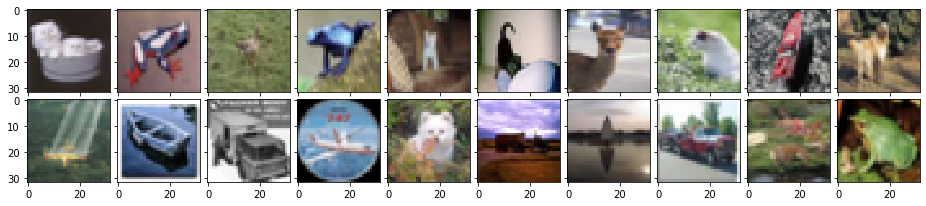

In [184]:
df_resnext4_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [185]:
df_resnext4_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.992864,0.000906,1095.530884,8,ship,3,cat,9812
1,0.995250,0.000898,1107.953735,0,airplane,6,frog,4744
2,0.999062,0.000896,1115.018677,4,deer,2,bird,1325
3,0.918964,0.000820,1121.106445,2,bird,6,frog,3615
4,0.986606,0.000761,1295.803101,3,cat,5,dog,4740
5,0.997638,0.000767,1300.490723,2,bird,5,dog,810
6,0.999297,0.000466,2145.291992,5,dog,4,deer,1217
7,0.987027,0.000440,2243.779785,2,bird,3,cat,3052
8,0.993101,0.000407,2437.718018,2,bird,8,ship,1685
9,0.998823,0.000322,3097.743408,4,deer,5,dog,4528


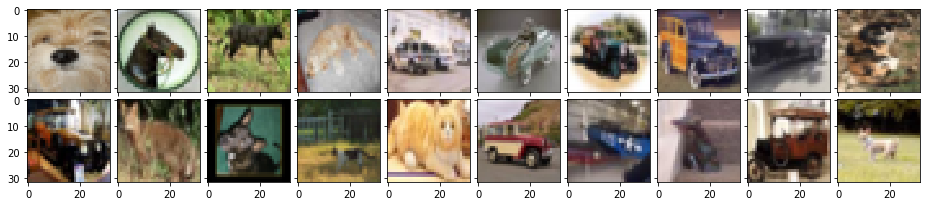

In [186]:
df_resnext4_errors_101  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [187]:
df_resnext4_errors_101

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.996358,0.002389,417.090912,3,cat,5,dog,1035
1,0.887847,0.001992,445.627350,6,frog,7,horse,1412
2,0.868874,0.001934,449.283966,7,horse,3,cat,743
3,0.995478,0.002200,452.404816,3,cat,5,dog,1134
4,0.996879,0.002081,478.928467,9,truck,1,automobile,368
5,0.994601,0.002016,493.451080,6,frog,1,automobile,351
6,0.997193,0.001984,502.681061,9,truck,1,automobile,342
7,0.998023,0.001683,593.072083,9,truck,1,automobile,378
8,0.847274,0.001398,605.875488,1,automobile,8,ship,1623
9,0.995697,0.001643,606.004333,5,dog,3,cat,783


#### WRN

In [188]:
output = './wrn_28_10/predictions_200.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9578
 -> Sanity Check: 9578 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.953876  0.9720  0.962853   1000.0000
1 automobile   0.972305  0.9830  0.977623   1000.0000
2 bird         0.963115  0.9400  0.951417   1000.0000
3 cat          0.905584  0.8920  0.898741   1000.0000
4  deer        0.956565  0.9690  0.962742   1000.0000
5 dog          0.915187  0.9280  0.921549   1000.0000
6 frog         0.971202  0.9780  0.974589   1000.0000
7 horse        0.990798  0.9690  0.979778   1000.0000
8 ship         0.972973  0.9720  0.972486   1000.0000
9 truck        0.976954  0.9750  0.975976   1000.0000
accuracy       0.957800  0.9578  0.957800      0.9578
macro avg      0.957856  0.9578  0.957775  10000.0000
weighted avg   0.957856  0.9578  0.957775  10000.0000


In [189]:
output = './wrn_28_10/predictions_200_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.8975
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score    support
0 airplane     0.846154  0.8800  0.862745   200.0000
1 automobile   0.957831  0.7950  0.868852   200.0000
2 bird         0.876847  0.8900  0.883375   200.0000
3 cat          0.841346  0.8750  0.857843   200.0000
4  deer        0.913876  0.9550  0.933985   200.0000
5 dog          0.928962  0.8500  0.887728   200.0000
6 frog         0.913043  0.9450  0.928747   200.0000
7 horse        0.974093  0.9400  0.956743   200.0000
8 ship         0.905473  0.9100  0.907731   200.0000
9 truck        0.842342  0.9350  0.886256   200.0000
accuracy       0.897500  0.8975  0.897500     0.8975
macro avg      0.899997  0.8975  0.897401  2000.0000
weighted avg   0.899997  0.8975  0.897401  2000.0000


/Applications/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


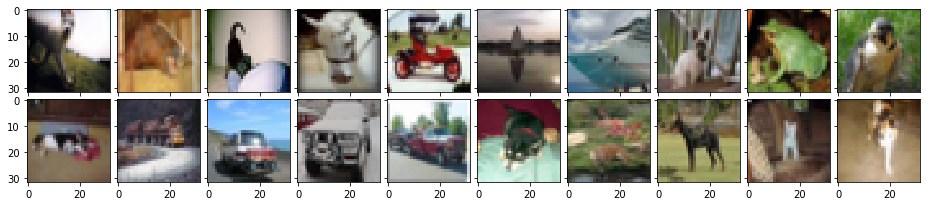

In [190]:
df_wrn_28_10_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [191]:
df_wrn_28_10_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.995518,0.000265,3762.125488,3,cat,5,dog,3059
1,0.994562,0.000225,4424.791504,3,cat,7,horse,6151
2,0.997089,0.000196,5077.148438,2,bird,5,dog,810
3,0.999023,0.000196,5107.759277,5,dog,7,horse,2895
4,0.998923,0.000191,5243.682617,9,truck,1,automobile,1969
5,0.999607,0.000187,5342.721680,0,airplane,8,ship,5548
6,0.999690,0.000183,5462.998047,0,airplane,8,ship,665
7,0.999728,0.000168,5936.280762,5,dog,3,cat,4614
8,0.999142,0.000160,6236.280273,6,frog,3,cat,2405
9,0.999551,0.000152,6564.255371,5,dog,2,bird,384


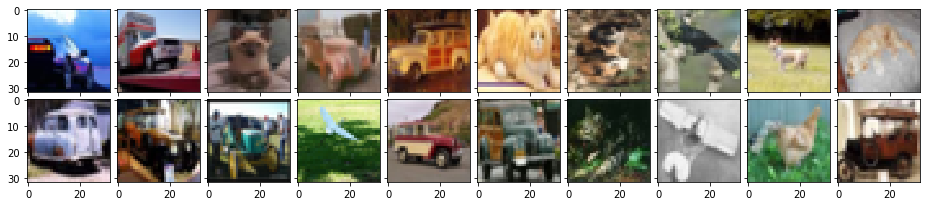

In [192]:
df_wrn_28_10_errors_101  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [193]:
df_wrn_28_10_errors_101

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.998249,0.000777,1285.422852,0,airplane,1,automobile,300
1,0.998971,0.000741,1347.244019,1,automobile,9,truck,1838
2,0.998506,0.000646,1544.983765,3,cat,5,dog,1177
3,0.995936,0.000539,1847.855225,9,truck,1,automobile,341
4,0.998563,0.000470,2125.257568,9,truck,1,automobile,390
5,0.998716,0.000446,2237.118896,5,dog,3,cat,602
6,0.999167,0.000437,2286.743164,5,dog,3,cat,783
7,0.998615,0.000436,2289.148438,0,airplane,2,bird,506
8,0.999127,0.000311,3216.876465,4,deer,5,dog,1076
9,0.998036,0.000298,3349.983398,3,cat,5,dog,1134


#### Pyramidnet_basic_110_84

In [194]:
output = './pyramidnet_basic_110_84/predictions_300.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9525
 -> Sanity Check: 9525 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.953465  0.9630  0.958209   1000.0000
1 automobile   0.967520  0.9830  0.975198   1000.0000
2 bird         0.946993  0.9290  0.937910   1000.0000
3 cat          0.900000  0.8820  0.890909   1000.0000
4  deer        0.947059  0.9660  0.956436   1000.0000
5 dog          0.911067  0.9220  0.916501   1000.0000
6 frog         0.968254  0.9760  0.972112   1000.0000
7 horse        0.981855  0.9740  0.977912   1000.0000
8 ship         0.974798  0.9670  0.970884   1000.0000
9 truck        0.973711  0.9630  0.968326   1000.0000
accuracy       0.952500  0.9525  0.952500      0.9525
macro avg      0.952472  0.9525  0.952440  10000.0000
weighted avg   0.952472  0.9525  0.952440  10000.0000


In [195]:
output = './pyramidnet_basic_110_84/predictions_300_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.888
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score   support
0 airplane     0.899471   0.850  0.874036   200.000
1 automobile   0.943503   0.835  0.885942   200.000
2 bird         0.868932   0.895  0.881773   200.000
3 cat          0.802956   0.815  0.808933   200.000
4  deer        0.905941   0.915  0.910448   200.000
5 dog          0.884211   0.840  0.861538   200.000
6 frog         0.909091   0.950  0.929095   200.000
7 horse        0.925743   0.935  0.930348   200.000
8 ship         0.914573   0.910  0.912281   200.000
9 truck        0.838565   0.935  0.884161   200.000
accuracy       0.888000   0.888  0.888000     0.888
macro avg      0.889298   0.888  0.887856  2000.000
weighted avg   0.889298   0.888  0.887856  2000.000


/Applications/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


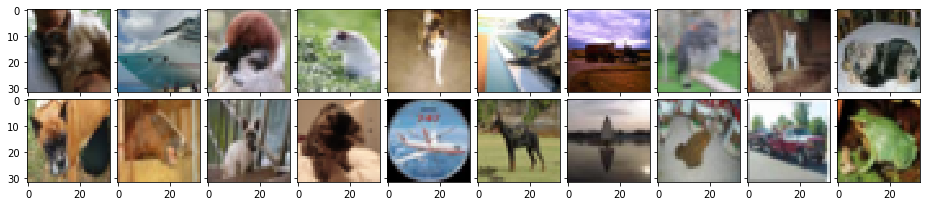

In [196]:
df_pyramidnet_basic_110_84_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [197]:
df_pyramidnet_basic_110_84_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.999932,6.812371e-05,1.467818e+04,5,dog,3,cat,8033
1,0.999941,5.865276e-05,1.704850e+04,0,airplane,8,ship,665
2,0.999965,3.466281e-05,2.884834e+04,5,dog,2,bird,4302
3,0.922281,2.601178e-05,3.545626e+04,2,bird,3,cat,3052
4,0.999970,2.571750e-05,3.888286e+04,5,dog,3,cat,7099
5,0.917015,2.352007e-05,3.898862e+04,1,automobile,5,dog,2525
6,0.999978,2.027431e-05,4.932243e+04,0,airplane,9,truck,3957
7,0.995277,1.917363e-05,5.190864e+04,3,cat,2,bird,7802
8,0.999969,1.750456e-05,5.712620e+04,3,cat,5,dog,4740
9,0.998803,1.557175e-05,6.414197e+04,3,cat,5,dog,4152


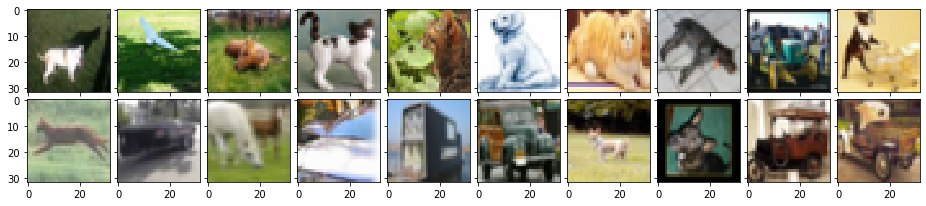

In [198]:
df_pyramidnet_basic_110_84_errors_101 = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [199]:
df_pyramidnet_basic_110_84_errors_101 

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.999227,0.000763,1310.132568,3,cat,5,dog,1053
1,0.998694,0.000715,1397.610840,0,airplane,2,bird,577
2,0.998762,0.000657,1521.337769,5,dog,4,deer,872
3,0.999243,0.000619,1615.100830,5,dog,3,cat,600
4,0.938066,0.000552,1698.656006,6,frog,3,cat,605
5,0.533860,0.000307,1736.308594,8,ship,5,dog,1045
6,0.999354,0.000560,1785.410767,5,dog,3,cat,602
7,0.954925,0.000295,3232.382080,2,bird,5,dog,1086
8,0.999541,0.000297,3363.749512,9,truck,1,automobile,379
9,0.934667,0.000173,5415.580566,3,cat,5,dog,1059


#### Resnext_29_8x64 

In [201]:
output = './resnext_29_8x64/predictions_300.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9568
 -> Sanity Check: 9568 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.956650  0.9710  0.963772   1000.0000
1 automobile   0.980885  0.9750  0.977934   1000.0000
2 bird         0.949799  0.9460  0.947896   1000.0000
3 cat          0.901590  0.9070  0.904287   1000.0000
4  deer        0.950884  0.9680  0.959366   1000.0000
5 dog          0.932186  0.9210  0.926559   1000.0000
6 frog         0.970030  0.9710  0.970515   1000.0000
7 horse        0.984678  0.9640  0.974229   1000.0000
8 ship         0.975928  0.9730  0.974462   1000.0000
9 truck        0.966203  0.9720  0.969093   1000.0000
accuracy       0.956800  0.9568  0.956800      0.9568
macro avg      0.956883  0.9568  0.956811  10000.0000
weighted avg   0.956883  0.9568  0.956811  10000.0000


In [202]:
output = './resnext_29_8x64/predictions_300_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.893
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score   support
0 airplane     0.913978   0.850  0.880829   200.000
1 automobile   0.930233   0.800  0.860215   200.000
2 bird         0.891626   0.905  0.898263   200.000
3 cat          0.821256   0.850  0.835381   200.000
4  deer        0.897196   0.960  0.927536   200.000
5 dog          0.903743   0.845  0.873385   200.000
6 frog         0.904762   0.950  0.926829   200.000
7 horse        0.953846   0.930  0.941772   200.000
8 ship         0.892157   0.910  0.900990   200.000
9 truck        0.837838   0.930  0.881517   200.000
accuracy       0.893000   0.893  0.893000     0.893
macro avg      0.894664   0.893  0.892672  2000.000
weighted avg   0.894664   0.893  0.892672  2000.000


/Applications/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


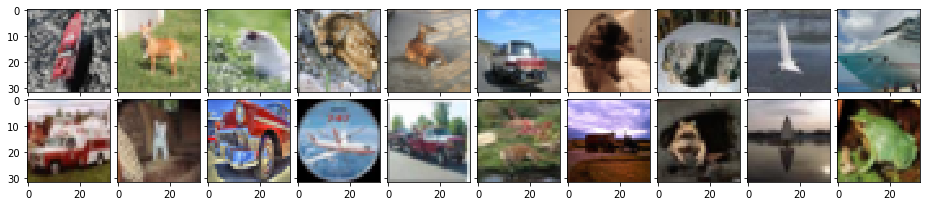

In [203]:
df_resnext8_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [204]:
df_resnext8_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.995789,0.000719,1385.040771,2,bird,8,ship,1685
1,0.998389,0.000699,1427.968506,4,deer,5,dog,3524
2,0.891600,0.000597,1492.881104,2,bird,3,cat,3052
3,0.997073,0.000604,1652.133057,3,cat,4,deer,3753
4,0.998757,0.000571,1749.792969,3,cat,4,deer,3696
5,0.997948,0.000556,1793.460693,9,truck,1,automobile,7311
6,0.999117,0.000477,2095.525635,5,dog,3,cat,811
7,0.988798,0.000458,2157.762207,3,cat,5,dog,4152
8,0.998791,0.000429,2326.438477,8,ship,2,bird,7000
9,0.999633,0.000359,2782.317139,0,airplane,8,ship,665


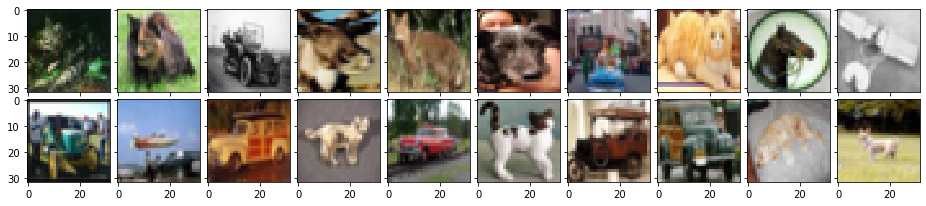

In [205]:
df_resnext8_errors_101 = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [206]:
df_resnext8_errors_101

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.979135,0.002836,345.260529,6,frog,3,cat,739
1,0.883935,0.002521,350.654144,5,dog,3,cat,787
2,0.995718,0.002190,454.714172,9,truck,1,automobile,283
3,0.971450,0.002103,461.880127,5,dog,4,deer,996
4,0.987136,0.001956,504.624969,4,deer,3,cat,668
5,0.997016,0.001702,585.816589,3,cat,5,dog,1175
6,0.988709,0.001222,809.226074,9,truck,1,automobile,381
7,0.998724,0.001205,828.823242,5,dog,3,cat,602
8,0.815576,0.000971,839.736084,6,frog,7,horse,1412
9,0.982411,0.001094,898.189209,3,cat,0,airplane,124


#### Resnet 44

In [217]:
output = './resnet_basic_44/predictions_160.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9209
 -> Sanity Check: 9209 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.933668  0.9290  0.931328   1000.0000
1 automobile   0.960317  0.9680  0.964143   1000.0000
2 bird         0.908530  0.8840  0.896097   1000.0000
3 cat          0.844581  0.8260  0.835187   1000.0000
4  deer        0.914454  0.9300  0.922162   1000.0000
5 dog          0.860078  0.8790  0.869436   1000.0000
6 frog         0.928780  0.9520  0.940247   1000.0000
7 horse        0.954222  0.9380  0.946041   1000.0000
8 ship         0.951292  0.9570  0.954138   1000.0000
9 truck        0.952669  0.9460  0.949323   1000.0000
accuracy       0.920900  0.9209  0.920900      0.9209
macro avg      0.920859  0.9209  0.920810  10000.0000
weighted avg   0.920859  0.9209  0.920810  10000.0000


In [218]:
output = './resnet_basic_44/predictions_160_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.829
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score   support
0 airplane     0.857143   0.720  0.782609   200.000
1 automobile   0.890710   0.815  0.851175   200.000
2 bird         0.805970   0.810  0.807980   200.000
3 cat          0.707317   0.725  0.716049   200.000
4  deer        0.813084   0.870  0.840580   200.000
5 dog          0.811224   0.795  0.803030   200.000
6 frog         0.830189   0.880  0.854369   200.000
7 horse        0.903553   0.890  0.896725   200.000
8 ship         0.880000   0.880  0.880000   200.000
9 truck        0.808036   0.905  0.853774   200.000
accuracy       0.829000   0.829  0.829000     0.829
macro avg      0.830723   0.829  0.828629  2000.000
weighted avg   0.830723   0.829  0.828629  2000.000


/Applications/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


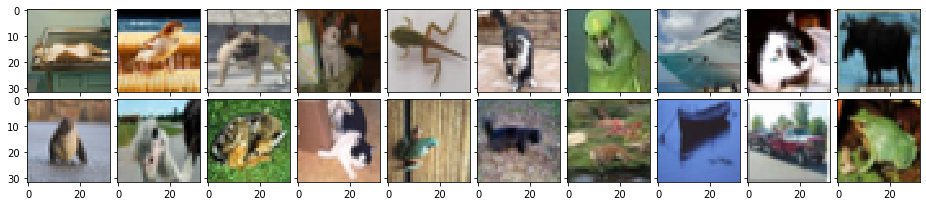

In [219]:
df_resnet44_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [220]:
df_resnet44_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.999794,3.591263e-07,2.783963e+06,8,ship,3,cat,4754
1,0.876949,3.004706e-07,2.918584e+06,4,deer,2,bird,1150
2,0.999525,2.527781e-07,3.954161e+06,5,dog,3,cat,2804
3,1.000000,2.288466e-07,4.369738e+06,3,cat,5,dog,640
4,0.997638,2.063561e-07,4.834544e+06,0,airplane,6,frog,8573
5,0.999921,1.212330e-07,8.247926e+06,5,dog,3,cat,1163
6,1.000000,9.495768e-08,1.053100e+07,6,frog,2,bird,7107
7,1.000000,6.945823e-08,1.439714e+07,0,airplane,8,ship,665
8,0.999992,6.707489e-08,1.490859e+07,5,dog,3,cat,7384
9,1.000000,4.666427e-08,2.142967e+07,7,horse,4,deer,9840


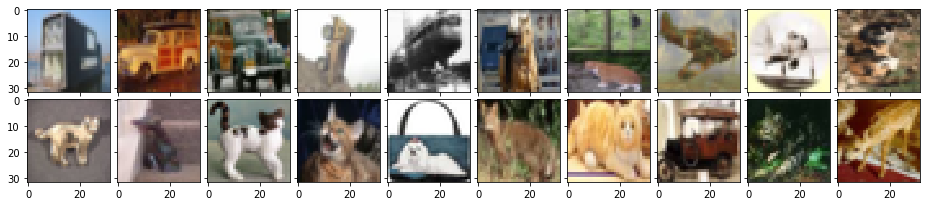

In [221]:
df_resnet44_errors_101 = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [222]:
df_resnet44_errors_101

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.999976,2.341639e-05,4.270410e+04,9,truck,8,ship,1761
1,0.999976,2.134170e-05,4.685550e+04,9,truck,1,automobile,390
2,0.999979,2.068353e-05,4.834663e+04,9,truck,1,automobile,392
3,0.945404,1.544639e-05,6.120546e+04,2,bird,9,truck,1811
4,0.999846,1.384439e-05,7.222027e+04,2,bird,8,ship,1631
5,0.999984,9.375803e-06,1.066558e+05,3,cat,7,horse,1486
6,0.970825,6.392732e-06,1.518638e+05,4,deer,3,cat,699
7,0.999967,4.188793e-06,2.387243e+05,6,frog,0,airplane,199
8,0.998424,3.675319e-06,2.716565e+05,8,ship,0,airplane,136
9,0.999986,3.559811e-06,2.809098e+05,5,dog,3,cat,783


#### Template - Copy and paste this cell six below to import data from a new model

In [ ]:
output = './resnet_basic_44/predictions_160.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)

In [ ]:
output = './resnet_basic_44/predictions_160_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)

In [ ]:
df_resnet44_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [ ]:
df_resnet44_errors

In [ ]:
df_resnet44_errors_101 = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [ ]:
df_resnet44_errors_101

### Comparison

#### CIFAR 10

The number of common misclassifications across all models: 2
{9227, 2405}


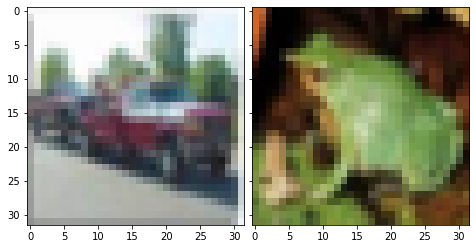

In [223]:
# View intersection of errors
intersect = set(df_resnext4_errors.img_index) & \
            set(df_resnet32_errors.img_index) & \
            set(df_densenet_errors.img_index) & \
            set(df_wrn_28_10_errors.img_index) & \
            set(df_pyramidnet_basic_110_84_errors.img_index) & \
            set(df_resnext8_errors.img_index) & \
            set(df_resnet44_errors.img_index)
            
print("The number of common misclassifications across all models:", len(intersect))
print(intersect)

# View errors 
# df_errors = pd.DataFrame({'resnext_29_4x64' : df_resnext4_errors.img_index,
#                           'resnext_29_8x64' : df_resnext8_errors.img_index,
#                           'resnet32' : df_resnet32_errors.img_index,
#                           'densenet' : df_densenet_errors.img_index,
#                           'wrn_28_10' : df_wrn_28_10_errors.img_index,
#                           'pyramidnet_basic_110_84' : df_pyramidnet_basic_110_84_errors.img_index,
#                           'resnet44' : df_resnet44_errors.img_index}
#                         )

images_to_print = []

for i in intersect:
    img=Image.fromarray(test_data_CIFAR10[i])
    images_to_print.append(img)

# Print the misclassified images
fig = plt.figure(figsize=(16, 4))
grid = ImageGrid(fig, 111, nrows_ncols=(1, len(intersect)), axes_pad=0.1,  )

for ax, im in zip(grid, images_to_print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

In [224]:
df = pd.DataFrame()

for m, me in [('resnet32', df_resnet32_errors.img_index), 
              ('resnext_29_4x64', df_resnext4_errors.img_index), 
              ('densenet', df_densenet_errors.img_index), 
              ('wrn_28_10', df_wrn_28_10_errors.img_index),
              ('pyramidnet_basic_110_84', df_pyramidnet_basic_110_84_errors.img_index),
              ('resnext_29_8x64', df_resnext8_errors.img_index),
              ('resnet44', df_resnet44_errors.img_index)]:
    for e in me:
        df.loc[m, str(e)] = True
    
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df.fillna(False, inplace=True)
cols = df.columns
df.reset_index(inplace=True)
df

,index,2525,8943,4036,1779,1905,5454,5548,7657,9227,2785,4965,2590,4740,4528,1935,9704,1765,5511,2405,3615,9812,4744,1325,810,1217,3052,1685,378,7559,5455,8743,4275,3957,5830,1969,8728,1772,2804,4614,2592,6151,7509,9431,7099,6741,3059,2895,665,384,2495,7311,4276,128,1506,8033,4302,7802,4152,7411,811,59,3524,3753,3696,7000,3560,7892,4754,1150,640,8573,1163,7107,7384,9840,2128,3867,7496,4198
0,resnet32,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,resnext_29_4x64,False,False,False,False,False,False,True,False,True,False,True,False,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,densenet,True,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,wrn_28_10,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,False,True,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,pyramidnet_basic_110_84,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,resnext_29_8x64,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
6,resnet44,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True


In [225]:
# Sample 
wk2 = df.groupby(['9227', '2785', '3957'])['index'].count()
wk2

9227  2785   3957 
True  False  False    3
             True     3
      True   False    1
Name: index, dtype: int64

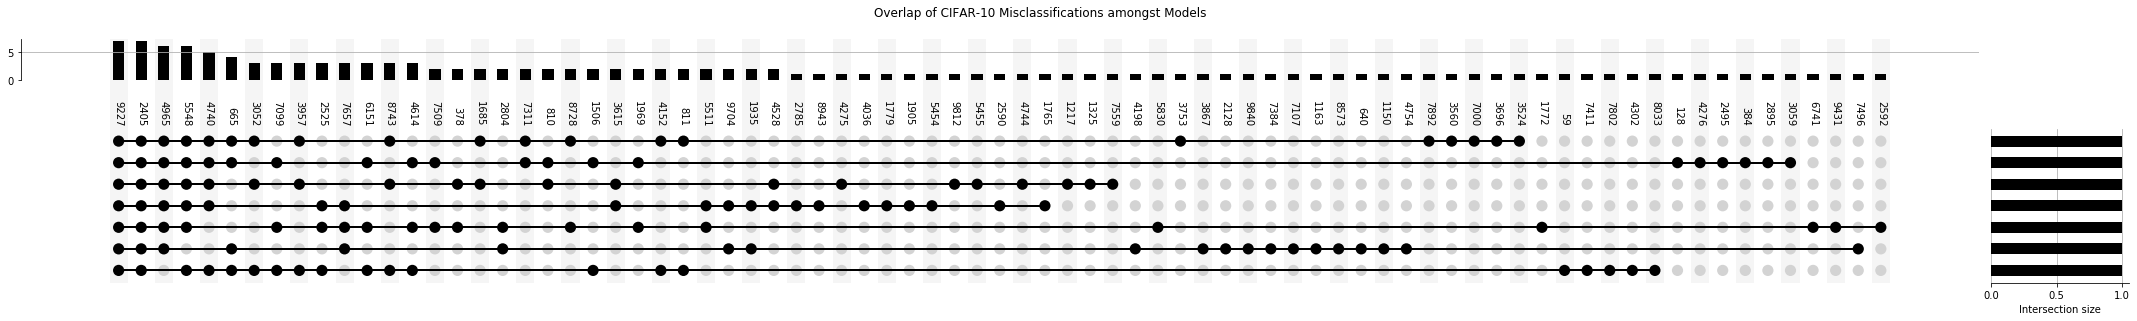

In [226]:
overlap = df.groupby(list(cols))['index'].count()

plot(overlap, orientation='vertical')  
from matplotlib import pyplot
plt.suptitle('Overlap of CIFAR-10 Misclassifications amongst Models')
pyplot.show()  

#### CIFAR 10.1

The number of common misclassifications across all models: 2
{602, 391}


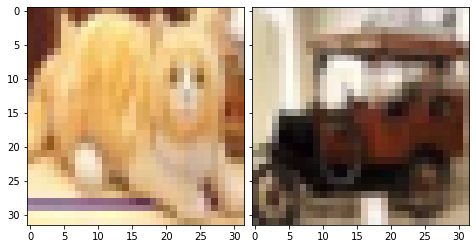

In [227]:
# View intersection of errors
intersect101 = set(df_resnext4_errors_101.img_index) & \
               set(df_resnet32_errors_101.img_index) & \
               set(df_densenet_errors_101.img_index) & \
               set(df_wrn_28_10_errors_101.img_index) &  \
               set(df_pyramidnet_basic_110_84_errors_101.img_index) & \
               set(df_resnext8_errors_101.img_index) & \
               set(df_resnet44_errors_101.img_index)
            
print("The number of common misclassifications across all models:", len(intersect101))
print(intersect101)

# View errors 
# df_errors_101 = pd.DataFrame({'resnext_29_4x64' : df_resnext4_errors_101.img_index,
#                              'resnext_29_8x64' : df_resnext8_errors_101.img_index,
#                              'resnet32' : df_resnet32_errors_101.img_index,
#                              'densenet' : df_densenet_errors_101.img_index,
#                              'wrn_28_10' : df_wrn_28_10_errors_101.img_index,
#                              'pyramidnet_basic_110_84' : df_pyramidnet_basic_110_84_errors_101.img_index,
#                              'resnet44' : df_resnet44_errors.img_index})

images_to_print = []

for i in intersect101:
    img=Image.fromarray(test_data_CIFAR101[i])
    images_to_print.append(img)

# Print the misclassified images
fig = plt.figure(figsize=(16, 4))
grid = ImageGrid(fig, 111, nrows_ncols=(1, len(intersect101)), axes_pad=0.1,  )

for ax, im in zip(grid, images_to_print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

In [228]:
df101 = pd.DataFrame()

for m, me in [('resnet32', df_resnet32_errors_101.img_index), 
              ('resnext_29_4x64', df_resnext4_errors_101.img_index), 
              ('densenet', df_densenet_errors_101.img_index), 
              ('wrn_28_10', df_wrn_28_10_errors_101.img_index),
              ('pyramidnet_basic_110_84', df_pyramidnet_basic_110_84_errors_101.img_index),
              ('resnext_29_8x64', df_resnext8_errors_101.img_index),
              ('resnet44', df_resnet44_errors_101.img_index)]:
    for e in me:
        df101.loc[m, str(e)] = True
    
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df101.fillna(False, inplace=True)
cols = df101.columns
df101.reset_index(inplace=True)
df101

,index,686,1126,221,98,482,641,513,1060,254,1426,1761,392,936,1412,304,1621,600,602,391,1528,1035,743,1134,368,351,342,378,1623,783,344,668,772,131,792,1076,365,76,1753,592,996,671,420,1148,433,336,300,1838,1177,341,390,506,352,379,577,739,124,1053,872,605,1045,1086,1059,1419,787,283,1175,381,1660,664,251,1811,1631,1486,699,199,136,715,1039,910
0,resnet32,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,resnext_29_4x64,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,densenet,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,True,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,wrn_28_10,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,pyramidnet_basic_110_84,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,resnext_29_8x64,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False
6,resnet44,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True


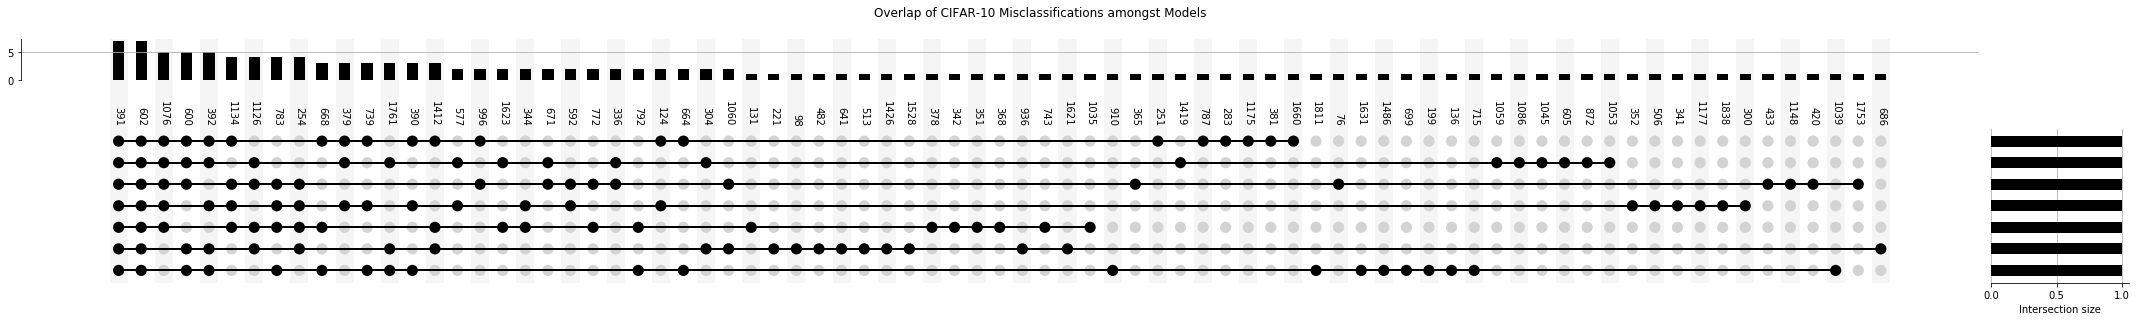

In [229]:
overlap = df101.groupby(list(cols))['index'].count()

plot(overlap, orientation='vertical')  
from matplotlib import pyplot
plt.suptitle('Overlap of CIFAR-10 Misclassifications amongst Models')
pyplot.show() 